# project food calories detection
# description to guess how much calories by cnn model
### Import Libraries

In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


'''
## Functions:
1. `load_data(path)`: 
   - Parameters:
     - `path` (str): Path to the dataset directory. Each subdirectory represents a class, and its name is used as the label.
   - Returns:
     - `data` (numpy.ndarray): An array containing the file paths of all images in the dataset.
     - `labels` (numpy.ndarray): An array containing the corresponding labels (class names) for each image.

## Example Usage:
```python
dataset = r'C:\Users\dell\.ms-ad\Downloads\New folder\final project DL\food calories'

data, labels = load_data(dataset)

# `data` contains the paths of all images in the dataset.
# `labels` contains the corresponding class labels for each image.
 """
    Loads images and their corresponding labels from the dataset directory.
    Returns file paths and labels.
    """

In [3]:

dataset = r'C:\Users\dell\.ms-ad\Downloads\New folder\final project DL\food calories'

def load_data(path):
    classes = os.listdir(path)
    data = []
    labels = []
    
    for class_label in classes:
        class_path = os.path.join(path, class_label)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                data.append(img_path)
                labels.append(class_label)
    
    return np.array(data), np.array(labels)

data, labels = load_data(dataset)


"""
Class Label Encoding and Visualization

1. Encode class labels:
   - `LabelEncoder` converts categorical labels to numeric format.
   - Input: `labels` (array of class names).
   - Output: `labels_encoded` (array of numeric labels).

2. Visualize class distribution:
   - `sns.countplot` creates a bar plot for class frequencies.
   - Adds a title for context.

Example Usage:
# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Plot class distribution
sns.countplot(x=labels)
plt.title('Class Distribution')
plt.show()

Dependencies:
- `sklearn.preprocessing.LabelEncoder`
- `seaborn`
- `matplotlib.pyplot`
"""


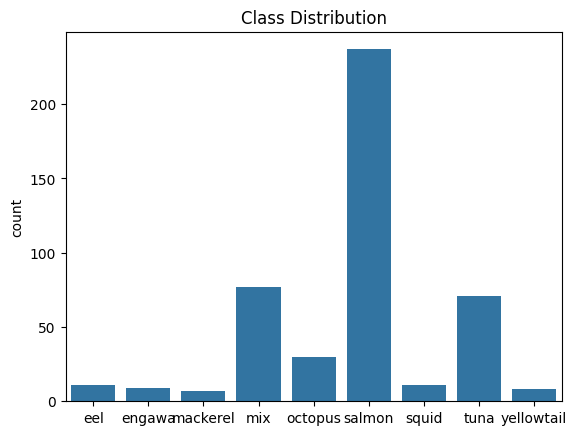

In [4]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
sns.countplot(x=labels)
plt.title('Class Distribution')
plt.show()


# Image data generator for augmentation

# Training and validation data generators

In [5]:
# for augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Training and validation data generators
train_generator = datagen.flow_from_directory(
    dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
        dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 372 images belonging to 9 classes.
Found 89 images belonging to 9 classes.


##### CNN model
"""
Model Architecture:

1. A convolutional neural network (CNN) built using `Sequential`.
2. Includes Conv2D layers, MaxPooling2D, BatchNormalization, Dense layers, and Dropout for regularization.
3. Input shape is (128, 128, 3), and the output layer uses `softmax` for classification based on the number of classes.
4. Summary: Displays the layer structure, parameter count, and output shapes.
"""


In [6]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),

    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.summary()


c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,257,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,268,809 (62.06 MB)

 Trainable params: 16,268,745 (62.06 MB)

 Non-trainable params: 64 (256.00 B)

##### Compile the model to calculate accurcy
##### Train the model to select number of ephoch

In [7]:

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    verbose=1
)


c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 768ms/step - accuracy: 0.2239 - loss: 4.6524 - val_accuracy: 0.5281 - val_loss: 1.9896
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 602ms/step - accuracy: 0.3065 - loss: 4.2100 - val_accuracy: 0.5169 - val_loss: 1.6006
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 605ms/step - accuracy: 0.3778 - loss: 2.0045 - val_accuracy: 0.5281 - val_loss: 1.6897
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 595ms/step - accuracy: 0.3996 - loss: 1.8272 - val_accuracy: 0.5281 - val_loss: 1.7187
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 602ms/step - accuracy: 0.4066 - loss: 1.5128 - val_accuracy: 0.5281 - val_loss: 1.6347
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 600ms/step - accuracy: 0.4893 - loss: 1.4376 - val_accuracy: 0.5281 - val_loss: 1.6937
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 578ms/step - accuracy: 0.5734 - loss: 1.3079 - val_accuracy: 0.5169 - val_loss: 1.5863
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 568ms/step - accuracy: 0.5116 - loss: 1.4442 - val_accuracy: 0

## Plot Training and Validation Metrics:
# The code plots the training and validation accuracy and loss using matplotlib to visualize model performance over epochs.
## Test Data Preparation:
# A datagen.flow_from_directory generator is created to preprocess and load test images from a specified directory with target size (128, 128).
## Model Evaluation: 
# The model is evaluated on the test dataset, returning the test loss and accuracy as metrics.
## Results Display:
# The test loss and accuracy are printed to provide insights into the model's performance on unseen data.







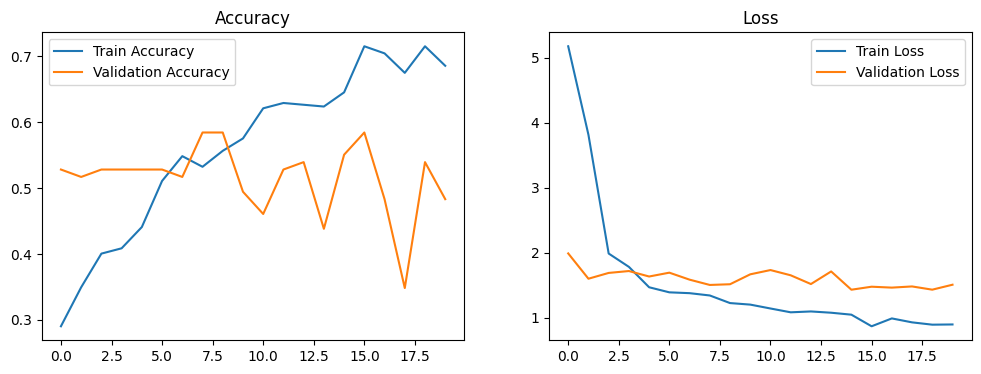

Found 461 images belonging to 9 classes.


c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 471ms/step - accuracy: 0.4221 - loss: 1.5853
Test Loss: 1.4461761713027954
Test Accuracy: 0.5401301383972168


In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()
test_generator = datagen.flow_from_directory(
    dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


### Evaluation Script

# Predictions Generation:
### The model generates predictions for the test data, and the predicted class indices are obtained using np.argmax on the output probabilities.


# Confusion Matrix:
### A confusion matrix is calculated to compare the true class indices with the predicted ones, and it is visualized using ConfusionMatrixDisplay.

# Visualization:
## The confusion matrix is displayed as a heatmap for easier interpretation of model performance.

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 484ms/step


<Figure size 800x800 with 0 Axes>

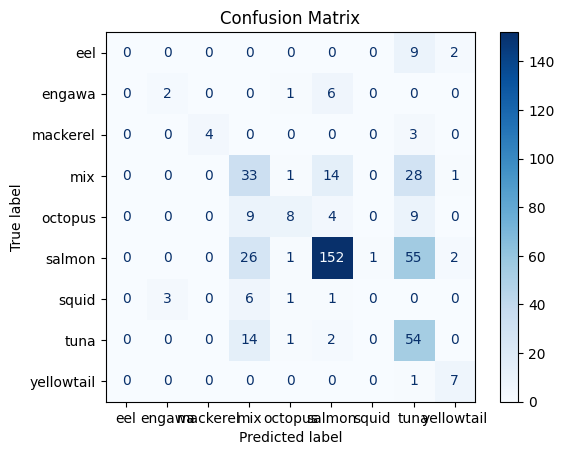

Classification Report:
              precision    recall  f1-score   support

         eel       0.00      0.00      0.00        11
      engawa       0.40      0.22      0.29         9
    mackerel       1.00      0.57      0.73         7
         mix       0.38      0.43      0.40        77
     octopus       0.62      0.27      0.37        30
      salmon       0.85      0.64      0.73       237
       squid       0.00      0.00      0.00        11
        tuna       0.34      0.76      0.47        71
  yellowtail       0.58      0.88      0.70         8

    accuracy                           0.56       461
   macro avg       0.46      0.42      0.41       461
weighted avg       0.62      0.56      0.57       461



c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [12]:

#` Generate predictions on the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
y_true = test_generator.classes             # True class indices
class_labels = list(test_generator.class_indices.keys())  # Class names

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Extra Work 

# fully connected

## one of the most important use fully connected use feature engeenering & selection  

In [18]:
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  
    Dense(512, activation='relu'),       
    Dropout(0.5),                        
    Dense(256, activation='relu'),       
    Dropout(0.5),
    Dense(128, activation='relu'),       
    Dense(train_generator.num_classes, activation='softmax')  
])


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)



c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 752ms/step - accuracy: 0.2489 - loss: 17.4493 - val_accuracy: 0.5281 - val_loss: 5.9747
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 604ms/step - accuracy: 0.3509 - loss: 15.2812 - val_accuracy: 0.5281 - val_loss: 4.3607
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 599ms/step - accuracy: 0.3376 - loss: 9.1442 - val_accuracy: 0.1573 - val_loss: 2.1916
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 644ms/step - accuracy: 0.3367 - loss: 3.7036 - val_accuracy: 0.1348 - val_loss: 1.8673
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 618ms/step - accuracy: 0.3455 - loss: 1.9709 - val_accuracy: 0.5281 - val_loss: 1.5729
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 601ms/step - accuracy: 0.4480 - loss: 1.7369 - val_accuracy: 0.5281 - val_loss: 1.5522
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 605ms/step - accuracy: 0.4570 - loss: 1.7701 - val_accuracy: 0.5281 - val_loss: 1.4107
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 604ms/step - accuracy: 0.4785 - loss: 1.8756 - val_accuracy:

# for fully connected
## Plot Training and Validation Metrics.
## Test Data Preparation.
## Model Evaluation.
## Results Display.







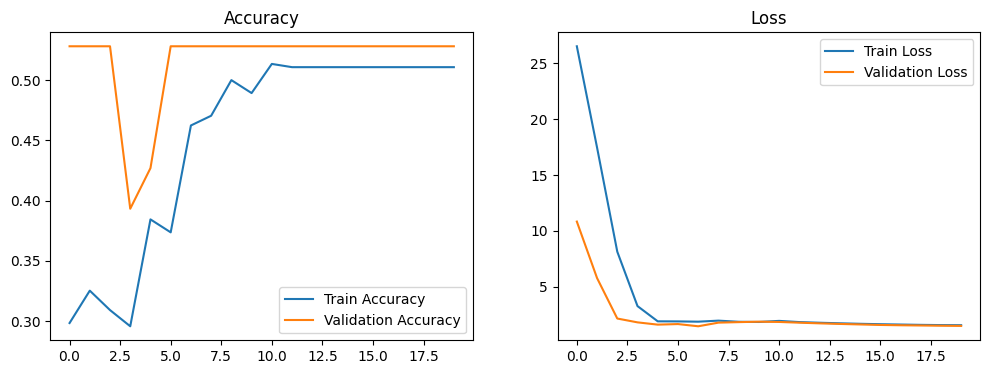

Found 461 images belonging to 9 classes.


c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.3639 - loss: 1.8392
Test Loss: 1.5544921159744263
Test Accuracy: 0.5140997767448425
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 404ms/step


<Figure size 800x800 with 0 Axes>

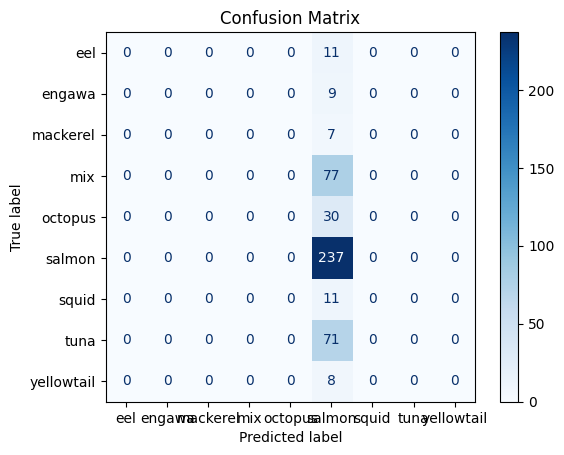

Classification Report:
              precision    recall  f1-score   support

         eel       0.00      0.00      0.00        11
      engawa       0.00      0.00      0.00         9
    mackerel       0.00      0.00      0.00         7
         mix       0.00      0.00      0.00        77
     octopus       0.00      0.00      0.00        30
      salmon       0.51      1.00      0.68       237
       squid       0.00      0.00      0.00        11
        tuna       0.00      0.00      0.00        71
  yellowtail       0.00      0.00      0.00         8

    accuracy                           0.51       461
   macro avg       0.06      0.11      0.08       461
weighted avg       0.26      0.51      0.35       461



c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [16]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

test_generator = datagen.flow_from_directory(
    dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Save the model
# Generate predictions
# Classification Report

In [20]:
model.save('food_calories_cnn.h5')

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

print(classification_report(test_generator.classes, predicted_classes, target_names=label_encoder.classes_))


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step
              precision    recall  f1-score   support

         eel       0.00      0.00      0.00        11
      engawa       0.00      0.00      0.00         9
    mackerel       0.00      0.00      0.00         7
         mix       0.00      0.00      0.00        77
     octopus       0.00      0.00      0.00        30
      salmon       0.51      1.00      0.68       237
       squid       0.00      0.00      0.00        11
        tuna       0.00      0.00      0.00        71
  yellowtail       0.00      0.00      0.00         8

    accuracy                           0.51       461
   macro avg       0.06      0.11      0.08       461
weighted avg       0.26      0.51      0.35       461



c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\.ms-ad\Downloads\anacoda last\envs\DLsept2024\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_